<a href="https://colab.research.google.com/github/jx-dohwan/Initial_public_offering_price_prediction/blob/main/feature_select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 공모주 시초가 예측 baseline(내가 개인적으로 추가한 6가지 변수를 제외해야 완전한 베이스 라인이 될 것이다.

In [16]:
# !unzip /content/drive/MyDrive/인공지능/경영빅데이터/data/ipo_원본데이터.zip -d /content/drive/MyDrive/인공지능/경영빅데이터/data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from scipy.stats import pointbiserialr

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/인공지능/경영빅데이터/data/IPOv3_resampled_data.csv')

## 데이터 기본 정보 파악

In [5]:
df.head()

,상장 시기(상장월),최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수),최근 3개월 공모주 수,"최근 ""따"" 비율",희망공모가_하한,희망공모가_상한,공모가,밴드수익률(공모가/공모가_상한),기관경쟁률,청약경쟁률,...,매출액(백만원),순이익(백만원),자본금(백만원),전문투자자(비율),우리사주조합(비율),일반청약자(비율),공모후 상장주식수(주식수),유통가능주식합계(비율),ROE,종속변수
0,5,6,14,0.43,11000,13000,14000,1.08,1847.12,2183.29,...,17098,1852,5744,0.75,0.00,0.25,11500000,0.2865,32.242340,0
1,12,1,26,0.04,8000,10000,6000,0.60,11.35,40.92,...,208,-3714,6908,0.77,0.03,0.20,13800000,0.6255,-53.763752,0
2,11,2,20,0.10,18000,23000,15000,0.65,64.33,566.54,...,577,-44067,7742,0.80,0.00,0.20,15400000,0.2759,-569.194007,1
3,3,6,18,0.33,26000,31000,20000,0.65,56.90,7.53,...,32683,4346,367,0.74,0.01,0.25,3963211,0.3554,1184.196185,0
4,10,1,14,0.07,4000,6000,5000,0.83,140.75,7.01,...,28652,0,13375,0.80,0.00,0.20,67500000,0.2500,0.000000,0


In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   상장 시기(상장월)                       832 non-null    int64  
 1   최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  832 non-null    int64  
 2   최근 3개월 공모주 수                     832 non-null    int64  
 3   최근 "따" 비율                        832 non-null    float64
 4   희망공모가_하한                         832 non-null    int64  
 5   희망공모가_상한                         832 non-null    int64  
 6   공모가                              832 non-null    int64  
 7   밴드수익률(공모가/공모가_상한)                832 non-null    float64
 8   기관경쟁률                            832 non-null    float64
 9   청약경쟁률                            832 non-null    float64
 10  의무보유확약                           832 non-null    float64
 11  대표주간사                            832 non-null    int64  
 12  IPO 주간사 순위            

In [7]:
print(df.describe())

       상장 시기(상장월)  최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  최근 3개월 공모주 수   최근 "따" 비율  \
count  832.000000                       832.000000    832.000000  832.000000   
mean     6.989183                         3.959135     16.694712    0.240916   
std      3.446846                         3.510447      5.961818    0.175321   
min      1.000000                         0.000000      1.000000    0.000000   
25%      4.000000                         1.000000     13.000000    0.110000   
50%      7.000000                         3.000000     17.000000    0.204336   
75%     10.000000                         6.000000     21.000000    0.351009   
max     12.000000                        17.000000     34.000000    0.770000   

            희망공모가_하한       희망공모가_상한            공모가  밴드수익률(공모가/공모가_상한)  \
count     832.000000     832.000000     832.000000         832.000000   
mean    14764.036058   17678.889423   16796.441106           0.976320   
std     14569.306516   16954.547504   14083.652039          

In [8]:
print(df.isnull().sum())


상장 시기(상장월)                         0
최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)    0
최근 3개월 공모주 수                       0
최근 "따" 비율                          0
희망공모가_하한                           0
희망공모가_상한                           0
공모가                                0
밴드수익률(공모가/공모가_상한)                  0
기관경쟁률                              0
청약경쟁률                              0
의무보유확약                             0
대표주간사                              0
IPO 주간사 순위                         0
총 공모주식 수                           0
구주매출(비율)                           0
매출액(백만원)                           0
순이익(백만원)                           0
자본금(백만원)                           0
전문투자자(비율)                          0
우리사주조합(비율)                         0
일반청약자(비율)                          0
공모후 상장주식수(주식수)                     0
유통가능주식합계(비율)                       0
ROE                                0
종속변수                               0
dtype: int64


## feature select

### 1) 상관관계 분석(t-검정이었나)

In [9]:
import pandas as pd

# 데이터프레임 df를 가정합니다. 이 데이터프레임은 위에서 언급한 모든 변수를 포함합니다.
correlation_matrix = df.corr()

print(correlation_matrix)


                                 상장 시기(상장월)  최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  \
상장 시기(상장월)                         1.000000                        -0.272039   
최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)   -0.272039                         1.000000   
최근 3개월 공모주 수                       0.305345                         0.383609   
최근 "따" 비율                         -0.380058                         0.879604   
희망공모가_하한                           0.129036                        -0.051520   
희망공모가_상한                           0.124021                        -0.043417   
공모가                                0.089743                        -0.007904   
밴드수익률(공모가/공모가_상한)                 -0.250601                         0.219171   
기관경쟁률                             -0.293447                         0.458879   
청약경쟁률                             -0.089826                         0.015240   
의무보유확약                            -0.222369                         0.076531   
대표주간사                              0.044

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


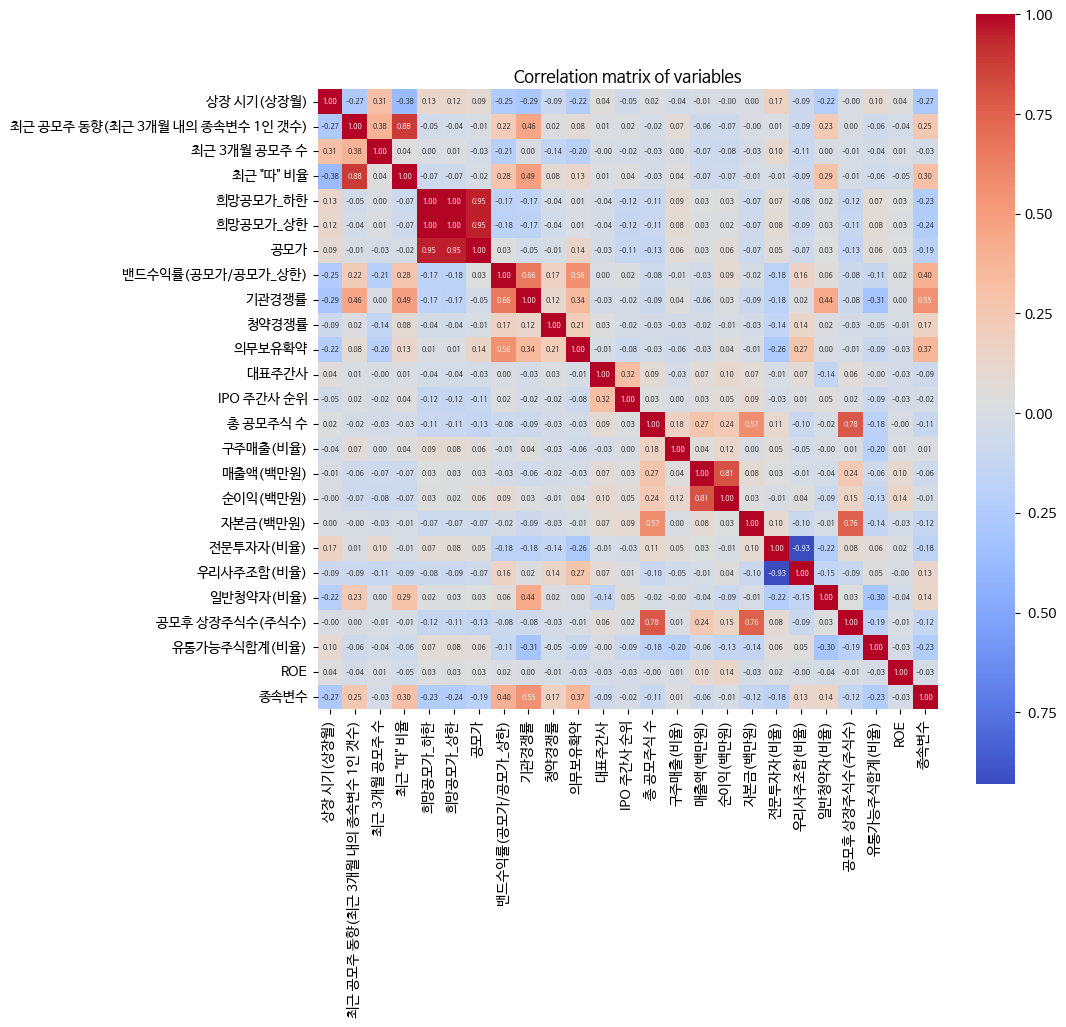

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cmap = 'coolwarm' , annot_kws={"size": 5})
plt.title('Correlation matrix of variables')
plt.show()


In [11]:
from scipy.stats import pointbiserialr

X = df.drop('종속변수',  axis=1)
y = df['종속변수']
# y는 이진변수, X는 연속 변수를 나타내는 DataFrame을 가정합니다.
# 각 피처와 목표 변수 사이의 point-biserial correlation 계산
for column in X.columns:
    pbc = pointbiserialr(X[column], y)
    print(f"The correlation between {column} and 종속변수 is {pbc.correlation}")


The correlation between 상장 시기(상장월) and 종속변수 is -0.2731980981217834
The correlation between 최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수) and 종속변수 is 0.252146663332071
The correlation between 최근 3개월 공모주 수 and 종속변수 is -0.02703111360159397
The correlation between 최근 "따" 비율 and 종속변수 is 0.3029395256076044
The correlation between 희망공모가_하한 and 종속변수 is -0.23103888791563995
The correlation between 희망공모가_상한 and 종속변수 is -0.23759075031160493
The correlation between 공모가 and 종속변수 is -0.1911934221244352
The correlation between 밴드수익률(공모가/공모가_상한) and 종속변수 is 0.39997884880865286
The correlation between 기관경쟁률 and 종속변수 is 0.5530871010361171
The correlation between 청약경쟁률 and 종속변수 is 0.17130757977608138
The correlation between 의무보유확약 and 종속변수 is 0.3662242303790061
The correlation between 대표주간사 and 종속변수 is -0.08544245859085323
The correlation between IPO 주간사 순위 and 종속변수 is -0.021447197281065887
The correlation between 총 공모주식 수 and 종속변수 is -0.11144281331897282
The correlation between 구주매출(비율) and 종속변수 is 0.0141542302000999

### 2) 로지스틱회귀분석

In [12]:
import statsmodels.api as sm

# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop('종속변수', axis=1)
y = df['종속변수']

# 로지스틱 회귀 모델 생성
logit_model = sm.Logit(y, sm.add_constant(X))

# 모델 훈련
result = logit_model.fit()

# 결과 출력
result.summary2()


Optimization terminated successfully.
         Current function value: 0.365320
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
===================================================================================
Model:                     Logit                 Pseudo R-squared:      0.473      
Dependent Variable:        종속변수                  AIC:                   657.8930   
Date:                      2023-06-05 16:36      BIC:                   775.9888   
No. Observations:          832                   Log-Likelihood:        -303.95    
Df Model:                  24                    LL-Null:               -576.70    
Df Residuals:              807                   LLR p-value:           5.6943e-100
Converged:                 1.0000                Scale:                 1.0000     
No. Iterations:            9.0000                                                  
-----------------------------------------------------------------------------------
                                 Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
-----------------------------------------------------------------------------------
const                            45.6584  54.7370  0.8341 0.4042  -61.6242 152.9409
상장 시기(상장월)                       -0.1113   0.0357 -3.1223 0.0018   -0.1812  -0.0414
최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  -0.2427   0.0971 -2.5008 0.0124   -0.4329  -0.0525
최근 3개월 공모주 수                      0.0710   0.0274  2.5895 0.0096    0.0173   0.1247
최근 "따" 비율                         4.6904   1.7033  2.7537 0.0059    1.3520   8.0288
희망공모가_하한                          0.0000   0.0002  0.1281 0.8980   -0.0003   0.0003
희망공모가_상한                          0.0000   0.0001  0.1600 0.8728   -0.0002   0.0003
공모가                              -0.0001   0.0001 -2.0007 0.0454   -0.0002  -0.0000
밴드수익률(공모가/공모가_상한)                -2.4340   1.6503 -1.4748 0.1403   -5.6686   0.8006
기관경쟁률                             0.0014   0.0004  3.2381 0.0012    0.0005   0.0022
청약경쟁률                             0.0019   0.0003  6.2244 0.0000    0.0013   0.0024
의무보유확약                            6.3864   0.9317  6.8546 0.0000    4.5603   8.2125
대표주간사                            -0.0618   0.0224 -2.7659 0.0057   -0.1057  -0.0180
IPO 주간사 순위                        0.0335   0.0218  1.5341 0.1250   -0.0093   0.0762
총 공모주식 수                         -0.0000   0.0000 -0.4499 0.6528   -0.0000   0.0000
구주매출(비율)                         -0.1516   0.8073 -0.1878 0.8510   -1.7340   1.4307
매출액(백만원)                         -0.0000   0.0000 -0.3599 0.7189   -0.0000   0.0000
순이익(백만원)                         -0.0000   0.0000 -0.9926 0.3209   -0.0000   0.0000
자본금(백만원)                          0.0000   0.0000  0.1171 0.9068   -0.0000   0.0000
전문투자자(비율)                       -40.3277  54.5044 -0.7399 0.4594 -147.1545  66.4990
우리사주조합(비율)                      -38.3678  54.4965 -0.7040 0.4814 -145.1791  68.4434
일반청약자(비율)                       -58.0794  55.3261 -1.0498 0.2938 -166.5165  50.3577
공모후 상장주식수(주식수)                   -0.0000   0.0000 -2.1494 0.0316   -0.0000  -0.0000
유통가능주식합계(비율)                     -4.3372   1.0269 -4.2234 0.0000   -6.3500  -2.3245
ROE                              -0.0000   0.0001 -0.0032 0.9975   -0.0002   0.0002
===================================================================================

"""

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


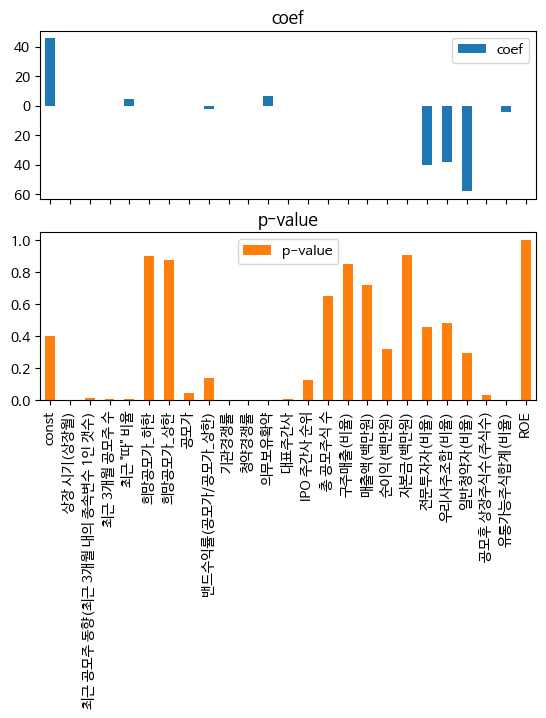

In [13]:
import matplotlib.pyplot as plt

# p-values와 회귀 계수를 DataFrame으로 변환
coef = pd.DataFrame({'coef': result.params, 'p-value': result.pvalues})

# bar plot 그리기
coef.plot(kind='bar', subplots=True)
plt.show()


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=verbose, n_jobs=n_jobs)
    
    grid_model.fit(train, y)

    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    results = pd.DataFrame(params)
    results['score'] = score

    results = results.sort_values('score', ascending=False)

    return results



# 로지스틱 회귀 모델 정의
logreg = LogisticRegression()

# 하이퍼파라미터 그리드
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# 데이터 준비 (X_train과 y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 그리드서치 실행
my_GridSearch(logreg, X_train, y_train, param_grid)



Fitting 5 folds for each of 7 candidates, totalling 35 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,C,score
0,0.001,0.787970
4,10.000,0.781955
5,100.000,0.781955
6,1000.000,0.781955
2,0.100,0.777444
3,1.000,0.775940
1,0.010,0.754887


In [15]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(C=0.001)
logreg.fit(X_train, y_train)

print("Logistic Regression Score: ", logreg.score(X_test, y_test))

logreg_pred = logreg.predict(X_test)
print("Logistic Regression: ")
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

Logistic Regression Score:  0.7125748502994012
Logistic Regression: 
[[51 26]
 [22 68]]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68        77
           1       0.72      0.76      0.74        90

    accuracy                           0.71       167
   macro avg       0.71      0.71      0.71       167
weighted avg       0.71      0.71      0.71       167



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3) 결정나무 CART


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=verbose, n_jobs=n_jobs)
    
    grid_model.fit(train, y)

    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    results = pd.DataFrame(params)
    results['score'] = score

    results = results.sort_values('score', ascending=False)

    return results

# Decision Tree 모델 정의
dt = DecisionTreeClassifier()

# 하이퍼파라미터 그리드
param_grid = {'max_depth': list(range(1, 8)),
              'min_samples_split': list(range(5, 10)),
              'min_samples_leaf': list(range(5, 10)),
              'max_leaf_nodes': list(range(10, 15)),  # 추가
              'max_features': ['auto', 'log2'],  # 추가
              'criterion' : ['gini', 'entropy']
             }

# 데이터 준비 (X_train과 y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 그리드서치 실행
my_GridSearch(dt, X_train, y_train, param_grid)

Fitting 5 folds for each of 3500 candidates, totalling 17500 fits


,criterion,max_depth,max_features,max_leaf_nodes,min_samples_leaf,min_samples_split,score
1676,gini,7,log2,12,5,6,0.852632
2272,entropy,3,auto,10,9,7,0.833083
2866,entropy,5,auto,14,8,6,0.830075
2832,entropy,5,auto,13,6,7,0.827068
1603,gini,7,auto,14,5,8,0.825564
...,...,...,...,...,...,...,...
1903,entropy,1,log2,11,5,8,0.581955
1882,entropy,1,log2,10,6,7,0.580451
1982,entropy,1,log2,14,6,7,0.580451
246,gini,1,log2,14,9,6,0.571429


Accuracy:  0.7305389221556886
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.65      0.69        77
           1       0.73      0.80      0.76        90

    accuracy                           0.73       167
   macro avg       0.73      0.72      0.73       167
weighted avg       0.73      0.73      0.73       167



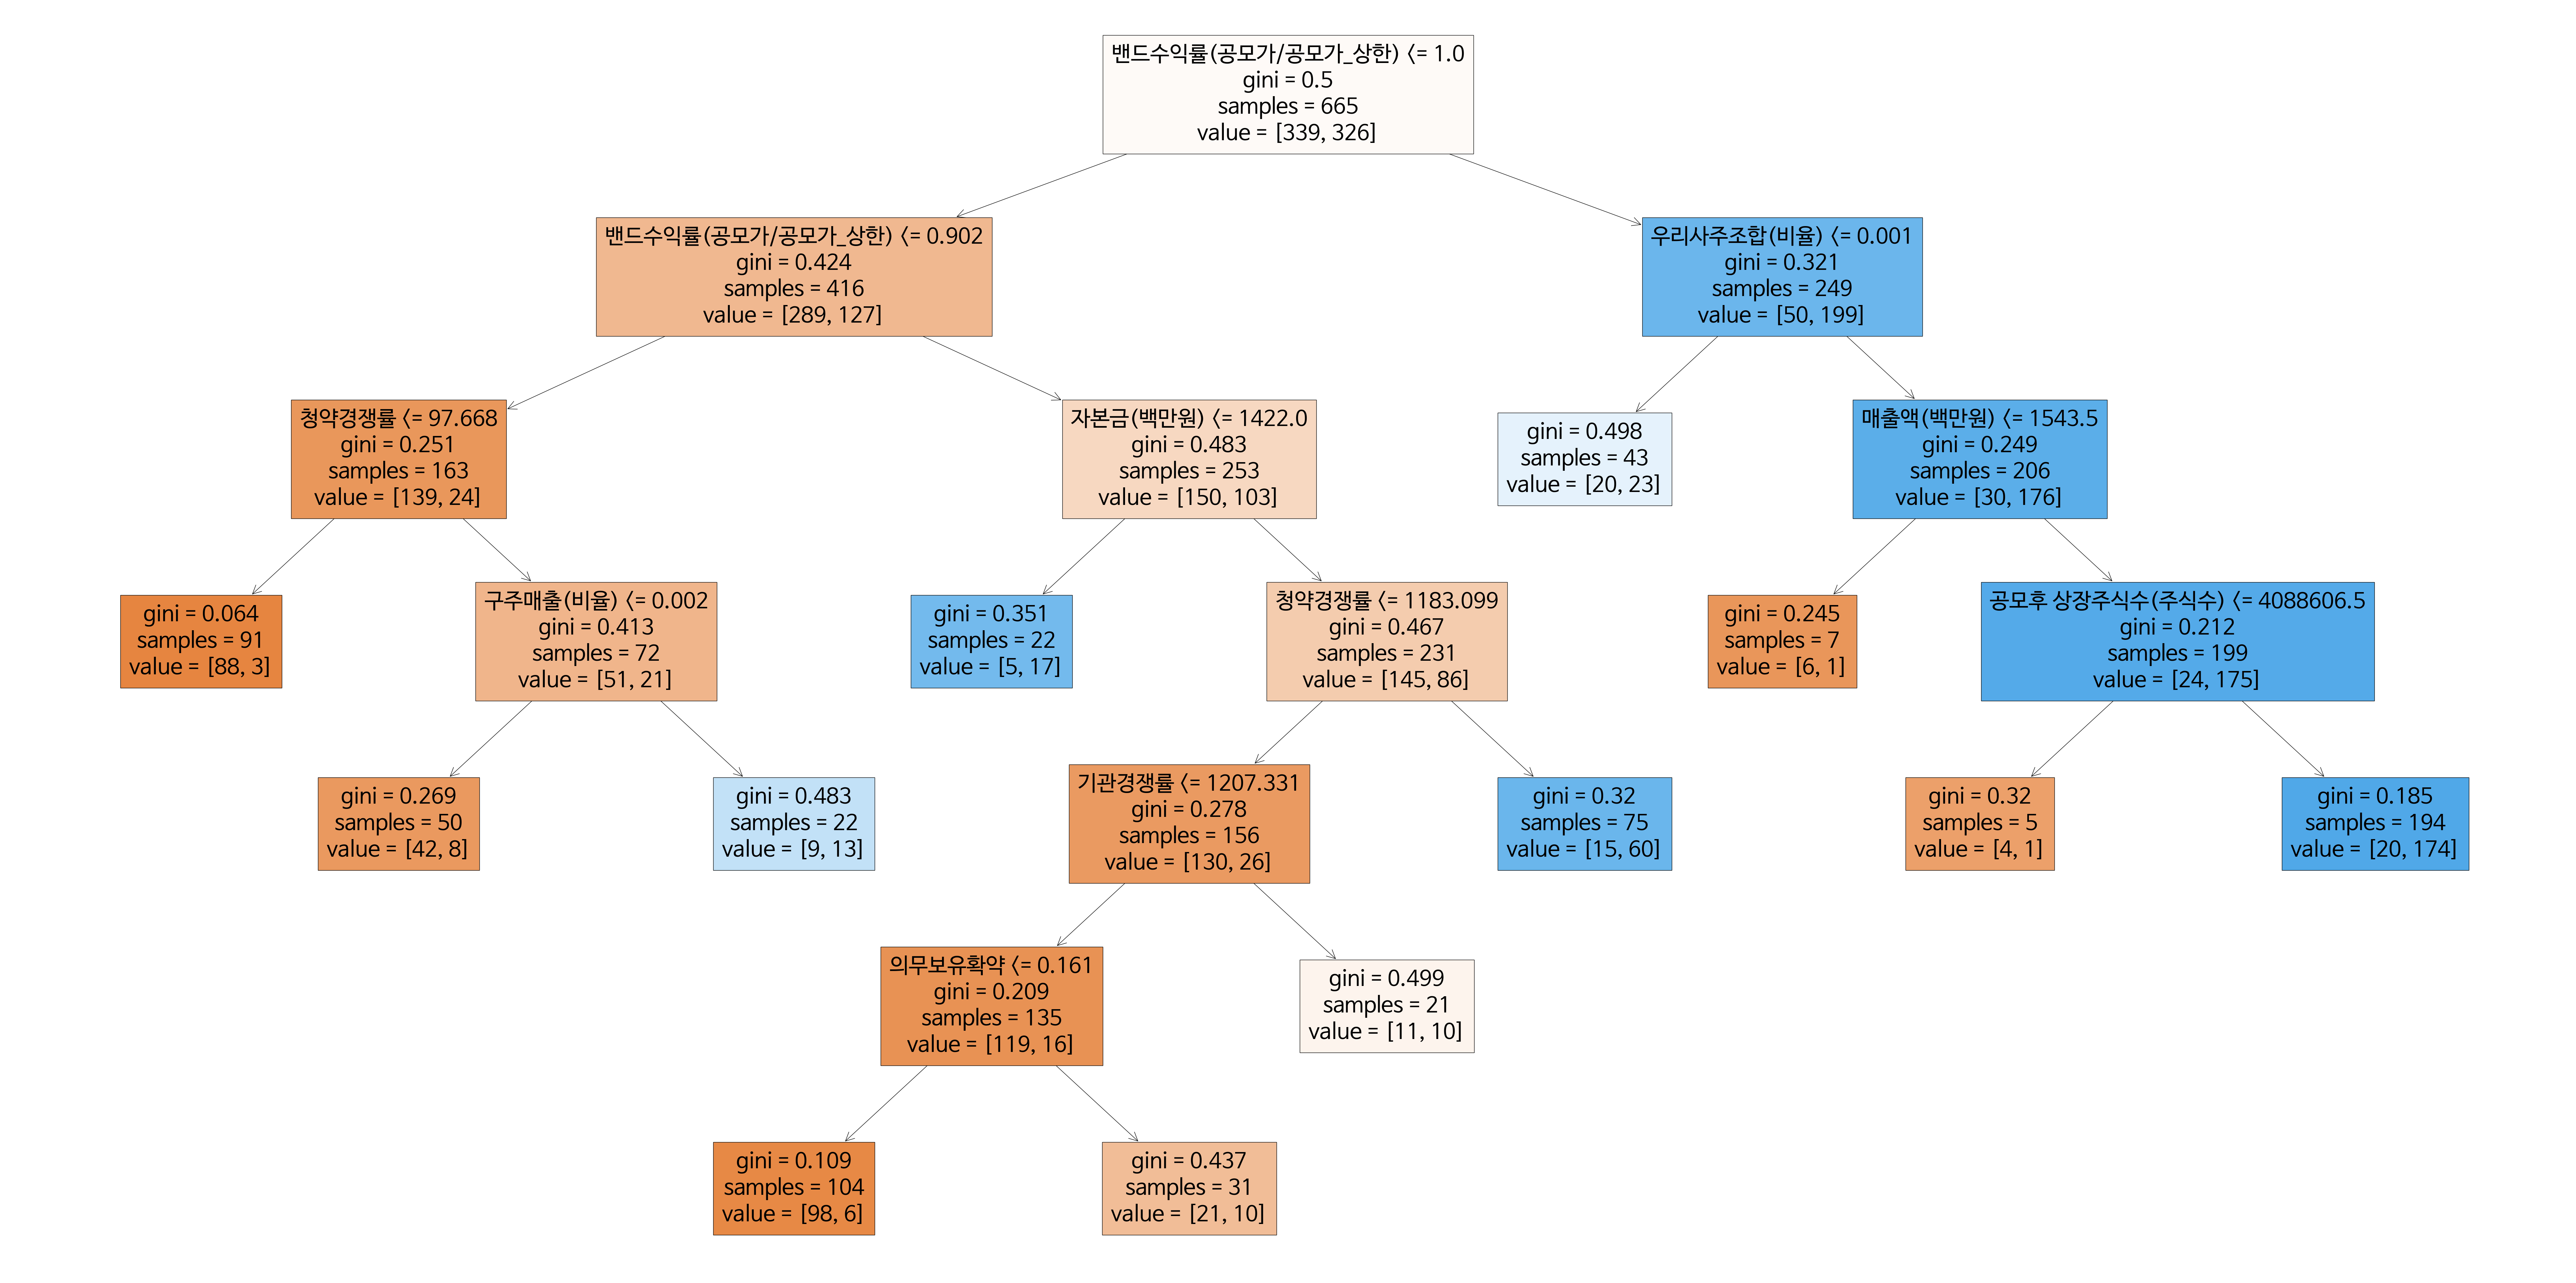

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Split data into training and test sets


# Define the classifier
dtc = DecisionTreeClassifier(criterion="gini", max_depth=7, max_features='log2', max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=6)

# Fit the classifier to the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pred = dtc.predict(X_test)

# Measure the performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(100,50))
plot_tree(dtc, filled=True, feature_names=X.columns)
plt.show()


### 4) 결정나무 C 5.0

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Accuracy:  0.718562874251497
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.60      0.66        77
           1       0.70      0.82      0.76        90

    accuracy                           0.72       167
   macro avg       0.72      0.71      0.71       167
weighted avg       0.72      0.72      0.71       167



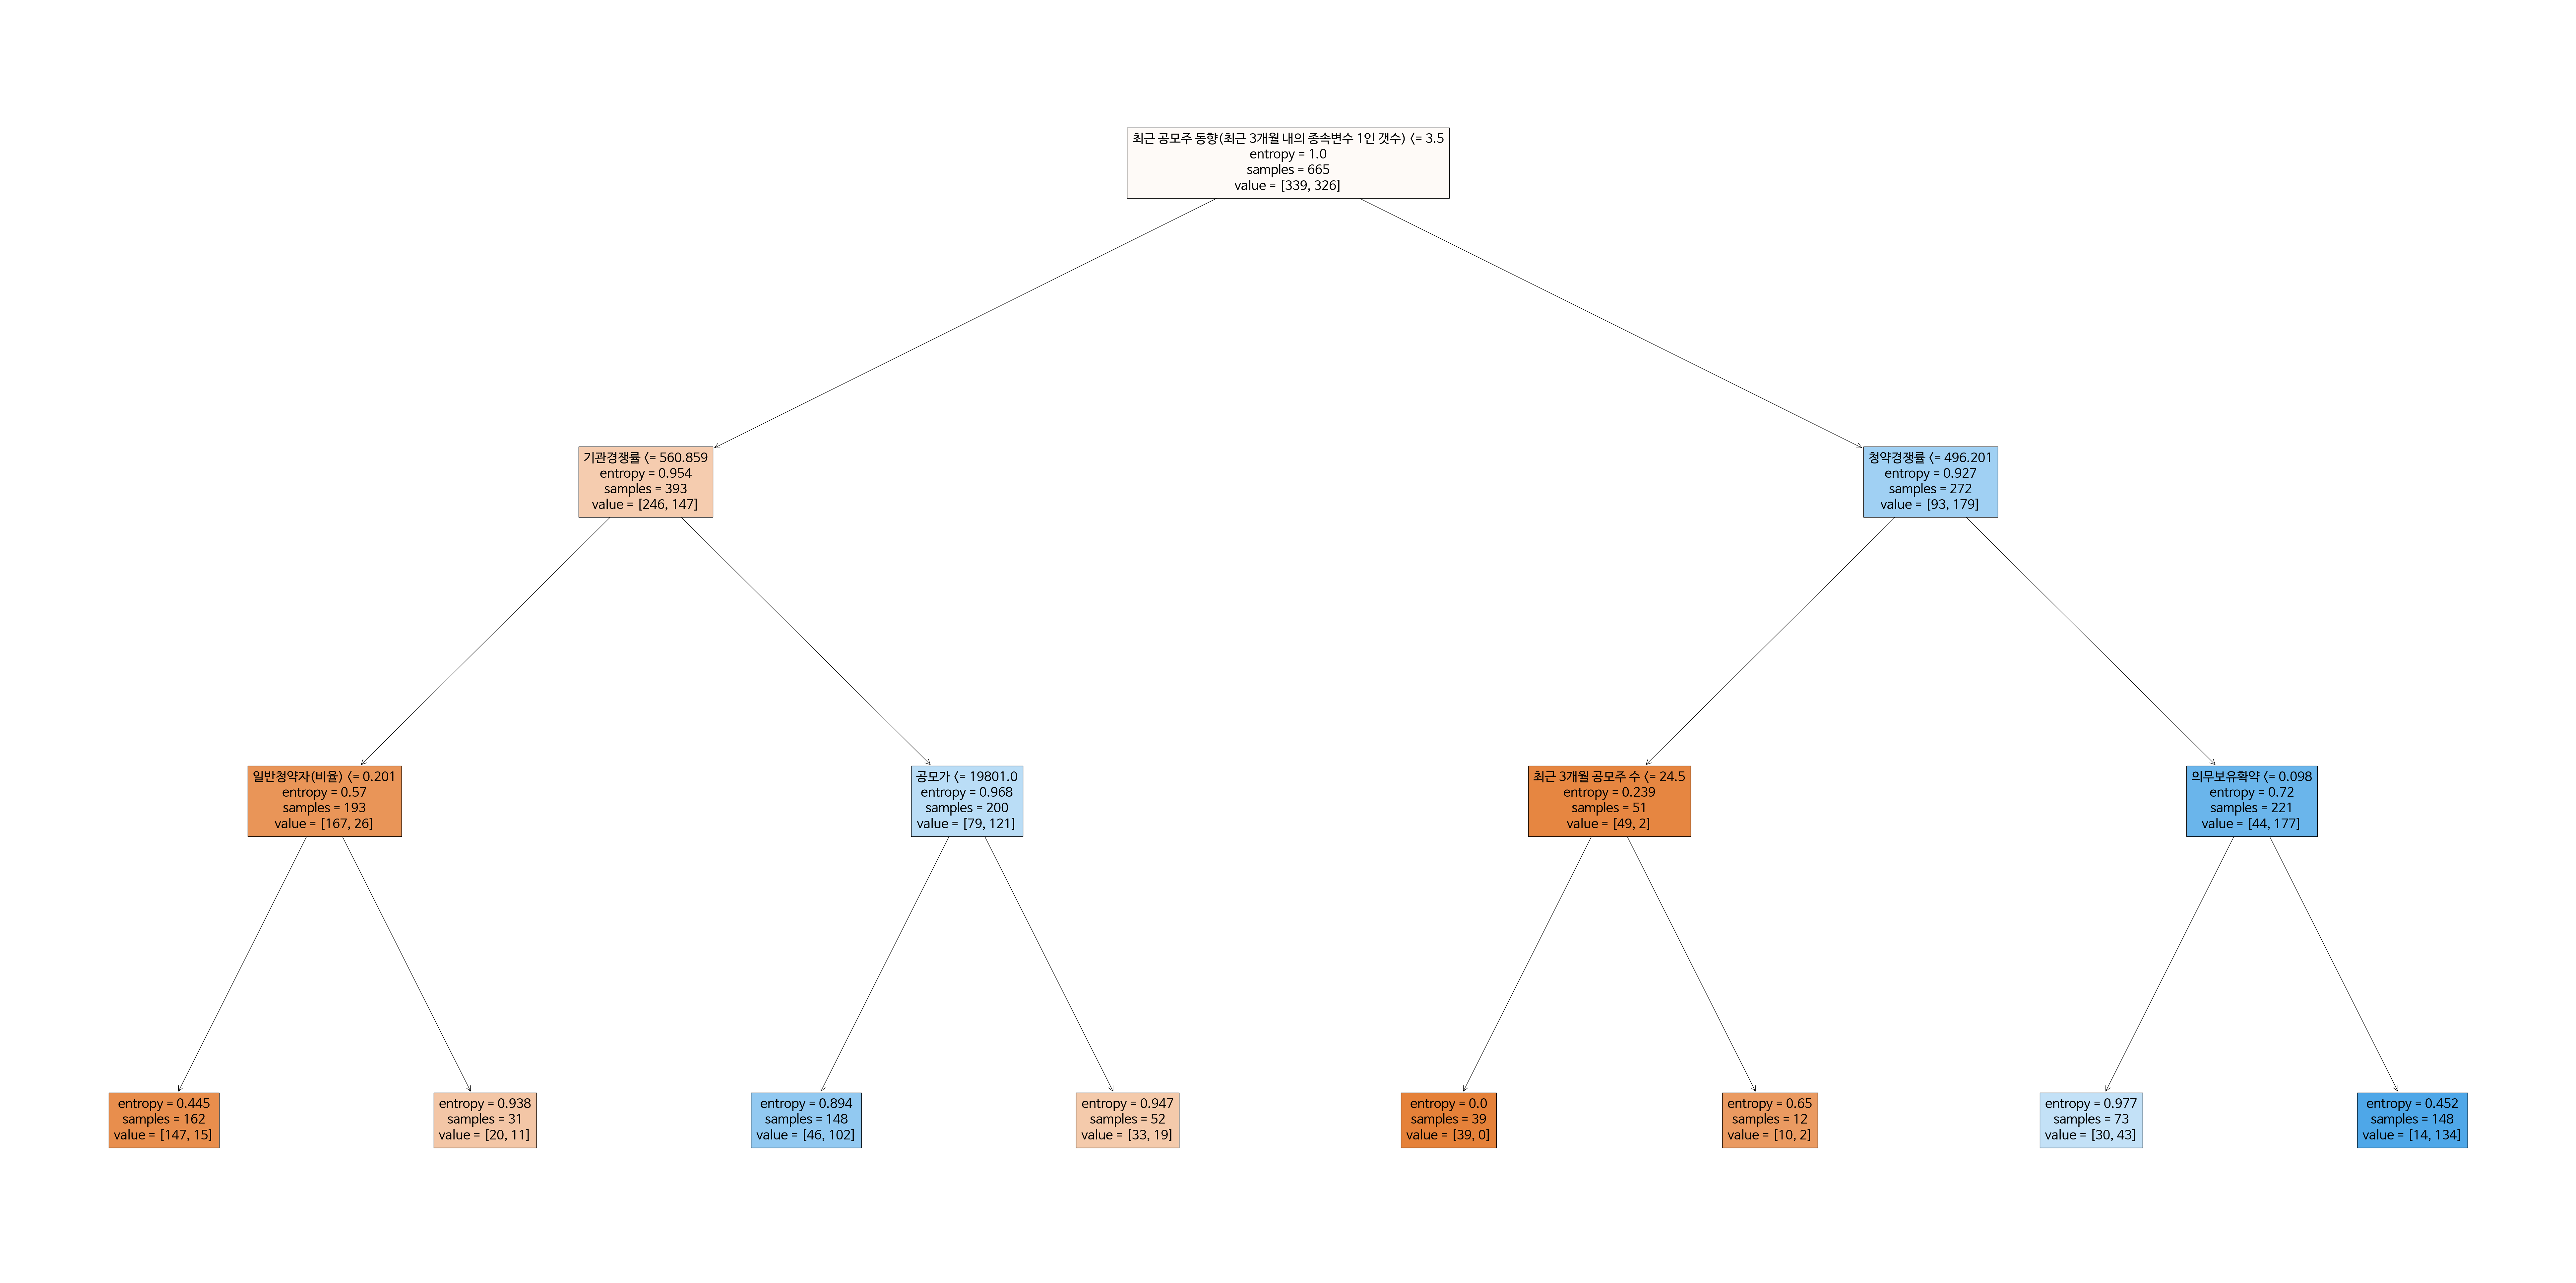

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifier
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3, max_features='auto', max_leaf_nodes=10, min_samples_leaf=9, min_samples_split=7)

# Fit the classifier to the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pred = dtc.predict(X_test)

# Measure the performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(100,50))
plot_tree(dtc, filled=True, feature_names=X.columns)
plt.show()


## 추가로 해야할 작업들
- 데이터의 정규화나 표준화, 이상치 처리, 변수 변환(로그 변환 등)을 수행하여 종속변수와의 상관관계를 높이기
- 총 16가지 변수를 사용하였다. 
 - 이를 선택한 기준은 기존 교수님이 제공해준 변수에 6가지 변수를 더 추가하였다. 
 - 그렇기 때문에 기존 변수로 작업했을때 성능과 6가지를 다 사용했을 때의 성능
 - 그리고 6개 중에서 상관관계가 유의미한 변수만 사용했을 때의 성능 세가지를 비교할 필요가 있다.
 - 물론 조건은 같은 모델이여야 한다.
- 그리드 서치, 랜덤포레스트, 유전알고리즘 등을 활용하여 최적의 해를 찾아서 모델 고도화하기

> 결론적으로 
 - 데이터 품질 향상 미작업 + 교수님 제공 변수 + 기본 하이퍼파라미터
 - 데이터 품질 향상 작업 + 교수님 제공 변수 + 기본 하이퍼파라미터
 - 데이터 품질 향상 작업 + 교수님 제공 변수에 추가로 6가지 변수 사용 + 기본 하이퍼파라미터
 - 데이터 품질 향상 작업 + 교수님 제공 변수에 추가로 6가지 변수중 유의미한 변수 사용 + 기본 하이퍼파라미터
 - 위의 것을 통해서 최적의 데이터 상태가 파악되면 하이퍼파라미터를 그리드서치, 랜덤서치등으로 고도화작업
 
 
- 마지막 결과 해석
 - 새로 추가한 변수가 미치는 영향
  - 상관관계
  - 실제 모델 결과
 - 모델별로 성능이 상이한데 더 좋은 성능의 모델이 있다면 왜 더 좋은지
 - 평가지표에서 recall precision, f1-score, accuracy가 있는데 여기에서는 무엇을 더 중요하게 봐야 하는지
 - 데이터 품질 개선을 위해서 어떤 기법을 왜 사용하였는가?

 


일단 제 의견은 다음과 같이 변수를 선택해서 최종 학습을 돌려보면 좋을 것 같아요
- 교수님이 주신 변수만 사용
- 상관계수를 통한 변수 선택
- p-value를 통한 변수 선택
- CART를 통한 변수선택
- C5.0을 통한 변수선택

그리고 우리가 생각했던 가설과 어떤 부분이 맞아떨여졌고 틀렸는지 확인하고 왜 그렇게 되었는지 분석하면 좋을것 같다는 의견입니다. 